In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

df = pd.read_csv("data/train.csv")


In [2]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df['Property_Area'].value_counts()


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [5]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [8]:
%matlpotlib inline
df['ApplicantIncome'].hist(bins=50)






UsageError: Line magic function `%matlpotlib` not found.


In [9]:
import IPython
print(IPython.sys_info())

{'commit_hash': 'dd83a2163',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/home/samyak/anaconda3/envs/py36/lib/python3.6/site-packages/IPython',
 'ipython_version': '6.5.0',
 'os_name': 'posix',
 'platform': 'Linux-4.15.0-39-generic-x86_64-with-debian-buster-sid',
 'sys_executable': '/home/samyak/anaconda3/envs/py36/bin/python',
 'sys_platform': 'linux',
 'sys_version': '3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) \n'
                '[GCC 7.2.0]'}


In [10]:
%matplotlib inline

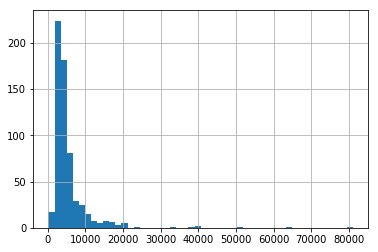

In [11]:
df['ApplicantIncome'].hist(bins=50)

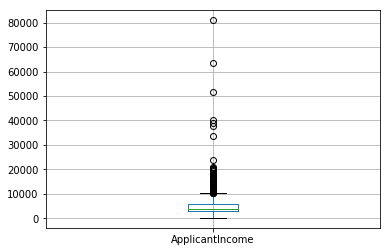

In [14]:
df.boxplot (column='ApplicantIncome')

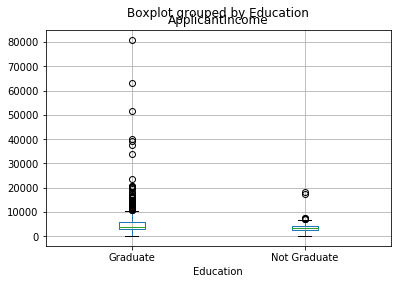

In [15]:
df.boxplot(column='ApplicantIncome', by = 'Education')

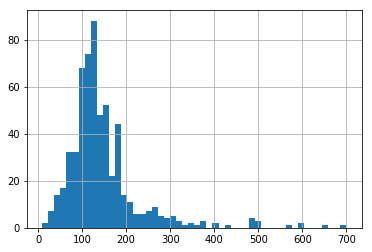

In [16]:
df['LoanAmount'].hist(bins=50)





In [21]:
temp2 = df.pivot_table(values='Loan_Status',index = 'Credit_History', aggfunc = lambda x : x.map({'Y':1,'N':0}).mean())
print(temp2)


                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5,1,'Probability of getting loans by credit history')

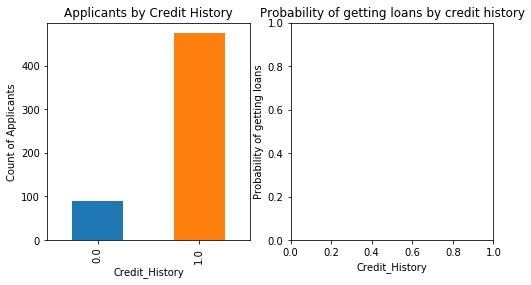

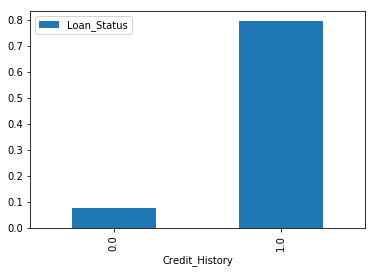

In [24]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index = 'Credit_History', aggfunc = lambda x : x.map({'Y':1,'N':0}).mean())


import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loans')
ax2.set_title("Probability of getting loans by credit history")



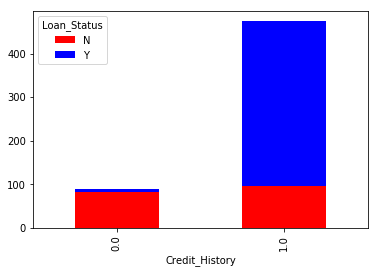

In [26]:
temp3 = pd.crosstab(df['Credit_History'],df['Loan_Status'])
temp3.plot(kind='bar',stacked=True, color = ['red','blue'],grid=False)

In [27]:

#observing the missing value
df.apply(lambda x: sum(x.isnull()),axis = 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

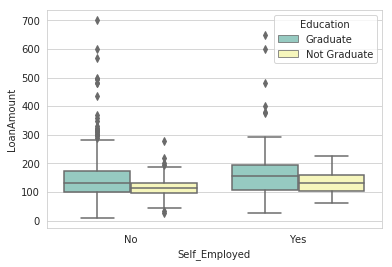

In [28]:
#df['LoanAmount'].fillna(df['LoanAmoount'].mean(), inplace = True)
#We can fill the numeric loan amount with mean but its better to see put mean loan amount accroding to education and self employment
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(x = 'Self_Employed',y = 'LoanAmount',hue = 'Education',data = df, palette="Set3")

In [29]:
#Self Employment is categorical and is largely NO so safe to fill NO for it
df['Self_Employed'].value_counts()


No     500
Yes     82
Name: Self_Employed, dtype: int64

In [30]:
df['Self_Employed'].fillna('No',inplace = True)



In [31]:
#compute median not mean as we have outliers for the 4 category of people
table = df.pivot_table(values='LoanAmount',index = 'Self_Employed',columns='Education',aggfunc=np.median)

In [33]:
def fage(x):
    return table.loc[x['Self_Employed'], x['Education']]

#Replace missing value
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage,axis=1),inplace=True)


In [34]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [35]:
#handle extreme cases log transformation
df['LoanAmount_log'] = np.log(df['LoanAmount'])



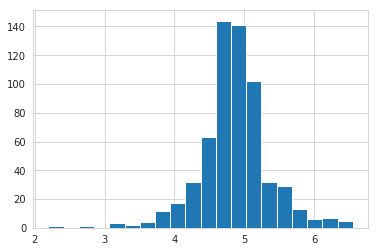

In [36]:
df['LoanAmount_log'].hist(bins=20)

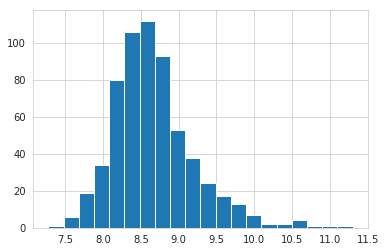

In [37]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [38]:
df.apply(lambda x : sum(x.isnull()),axis=0)



Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [39]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [40]:
df['Gender'].fillna('Male',inplace=True)

In [41]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [42]:
df['Married'].fillna('Yes',inplace=True)

In [43]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [44]:
df['Dependents'].fillna('0',inplace=True)

In [45]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [46]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace = True)

In [47]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [48]:
df['Credit_History'].fillna(1.0,inplace = True)

In [49]:
df.apply(lambda x : sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [50]:
#convert categorical attribute into numerical attribute
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes


Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and assessing performance
def classification_model(model,data,predictors,outcome):
    #fit the model:
    model.fit(data[predictors],data[outcome])
    #make predictions on training set:
    predictions = model.predict(data[predictors])
    #print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    #perform k-fold cross validation with 5 folds
    kf = KFold(data.shape[0],n_folds=5)
    Acc = []
    for train,test in kf:
        #filter training data
        train_predictors = (data[predictors].iloc[train,:])
        #the target we are using to train the algorithm
        train_target = data[outcome].iloc[train]
        #training the algo using predictors and target
        model.fit(train_predictors,train_target)
        #record the error from each cross validation run
        Acc.append(model.score(data[predictors].iloc[test,:],data[outcome].iloc[test]))
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(Acc)))
    #fit the model again so that it can be refered to the outside function
    model.fit(data[predictors],data[outcome])


In [60]:
import random
random.seed(1)
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
outcome_var = 'Loan_Status'
classification_model(model,df,predictor_var,outcome_var)



Accuracy : 80.945%
Cross-Validation Score : 78.179%


In [54]:
predictor_var = ['Credit_History','Gender','Education','Married']
classification_model(model,df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [55]:
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model,df,predictor_var,outcome_var)


Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [61]:
predictor_var = ['Gender']
classification_model(model,df,predictor_var,outcome_var)

Accuracy : 68.730%
Cross-Validation Score : 68.729%


In [62]:
test_df = pd.read_csv("data/test.csv")

In [63]:
test_df['Self_Employed'].fillna('No',inplace = True)

In [64]:
test_df['LoanAmount'].fillna(test_df[test_df['LoanAmount'].isnull()].apply(fage,axis=1),inplace=True)

In [65]:
test_df['LoanAmount_log'] = np.log(test_df['LoanAmount'])

In [66]:
test_df['TotalIncome'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']
test_df['TotalIncome_log'] = np.log(test_df['TotalIncome'])

In [67]:
test_df['Gender'].fillna('Male',inplace=True)

In [68]:
test_df['Married'].fillna('Yes',inplace=True)

In [69]:
test_df['Dependents'].fillna('0',inplace=True)

In [70]:
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mean(),inplace = True)

In [71]:
test_df['Credit_History'].fillna(1.0,inplace = True)

In [79]:
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for i in var_mod:
    test_df[i] = le.fit_transform(test_df[i])
test_df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
LoanAmount_log       float64
TotalIncome            int64
TotalIncome_log      float64
dtype: object

In [77]:
test_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,4.700480,5720,8.651724
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,4.836282,4576,8.428581
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,5.337538,6800,8.824678
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,4.605170,4886,8.494129
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,4.356709,3276,8.094378
5,LP001054,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2,5.023881,5587,8.628198
6,LP001055,0,0,1,1,0,2226,0,59.0,360.0,1.0,1,4.077537,2226,7.707962
7,LP001056,1,1,2,1,0,3881,0,147.0,360.0,0.0,0,4.990433,3881,8.263848
8,LP001059,1,1,2,0,0,13633,0,280.0,240.0,1.0,2,5.634790,13633,9.520249
9,LP001067,1,0,0,1,0,2400,2400,123.0,360.0,1.0,1,4.812184,4800,8.476371


In [78]:
df.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,130.0,360.0,1.0,2,1,4.867534,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,6000.0,8.699515
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,5.587249,9613.0,9.170872
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1,4.553877,3849.0,8.255569
7,LP001014,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0,5.062595,5540.0,8.619750
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1,5.123964,5532.0,8.618305
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0,5.855072,23809.0,10.077819


In [83]:
model = LogisticRegression()
predictor_var = ['Credit_History']
model.fit(df[predictor_var],df[outcome_var])
predictions = model.predict(test_df[predictor_var])
predictions


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,